In [1]:
import pandas as pd
from IPython.display import clear_output

In [26]:
import random
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import matplotlib.pyplot as plt

class CovertDecisionModel:
    
    def __init__(self):
        pass
        
    def convert_k_to_p(self, d_prime, k1, k2):
        
        a_given_a = st.norm.cdf(k1 + d_prime/2)
        b_given_a = 1 - st.norm.cdf(k2 + d_prime/2)
        a_given_b = st.norm.cdf(k1 - d_prime/2)
        b_given_b = 1 - st.norm.cdf(k2 - d_prime/2)
        
        p_aa = a_given_a*b_given_a + b_given_a*a_given_a
        p_ab = a_given_a*b_given_b + b_given_a*a_given_b
        p_ba = a_given_b*b_given_a + b_given_b*a_given_a
        p_bb = a_given_b*b_given_b + b_given_b*a_given_b
        
        p_false = p_aa + p_bb
        p_hit = p_ab + p_ba
        
        return p_false, p_hit
        
    def convert_k_to_z(self, d_prime, k1, k2):
        
        p_false, p_hit = self.convert_k_to_p(d_prime, k1, k2)
        return st.norm.ppf(p_false), st.norm.ppf(p_hit)
        
    def sample_k1_k2_values_to_z(self, k_range, d_prime, num_points):
        
        #CC2a
        zf_vals = []
        zh_vals = []
        
        k_range = [n for n in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num'])]
        for _ in range(num_points):
            k1 = random.choice(k_range)
            
            k2_range = [n for n in k_range if n >= k1]
            k2 = random.choice(k2_range)
            
            z_f, z_h = self.convert_k_to_z(d_prime, k1, k2)
            
            zf_vals.append(z_f)
            zh_vals.append(z_h)
            
        return zf_vals, zh_vals
    
    def sample_k1_k2_values_to_p(self, k_range, d_prime, num_points):
        
        # CC2a
        pf_vals = []
        ph_vals = []
        
        k_range = [n for n in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num'])]
        for _ in range(num_points):
            k1 = random.choice(k_range)
            
            k2_range = [n for n in k_range if n >= k1]
            k2 = random.choice(k2_range)
            
            p_f, p_h = self.convert_k_to_p(d_prime, k1, k2)
            
            pf_vals.append(p_f)
            ph_vals.append(p_h)
            
        return pf_vals, ph_vals
    
    def sample_k_values_to_z(self, k_range, d_prime, num_points):
        
        # CC2s
        zf_vals = []
        zh_vals = []
        
        k_range = [n for n in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num'])]
        for _ in range(num_points):
            k = random.choice(k_range)
            z_f, z_h = self.convert_k_to_z(d_prime, -k, k)
            
            zf_vals.append(z_f)
            zh_vals.append(z_h)
            
        return zf_vals, zh_vals
    
    def sample_k_values_to_p(self, k_range, d_prime, num_points):
        
        # CC2s
        pf_vals = []
        ph_vals = []
        
        k_range = [n for n in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num'])]
        for _ in range(num_points):
            k = random.choice(k_range)
            p_f, p_h = self.convert_k_to_p(d_prime, -k, k)
            
            pf_vals.append(p_f)
            ph_vals.append(p_h)
            
        return pf_vals, ph_vals
    
    def convert_k_to_p_cc1(self, d_prime, k):

        p_false = st.norm.cdf(k)*(1 - st.norm.cdf(k)) + st.norm.cdf(k-d_prime)*(1 - st.norm.cdf(k-d_prime))
        p_hit = st.norm.cdf(k)*(1 - st.norm.cdf(k-d_prime)) + (1 - st.norm.cdf(k))*st.norm.cdf(k-d_prime)
        
        return p_false, p_hit
        
    def convert_k_to_z_cc1(self, d_prime, k):
        
        p_false, p_hit = self.convert_k_to_p_cc1(d_prime, k)
        return st.norm.ppf(p_false), st.norm.ppf(p_hit)
    
    def sample_k_values_to_z_cc1(self, k_range, d_prime, num_points):
        
        # CC1
        zf_vals = []
        zh_vals = []
        
        k_range = [n for n in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num'])]
        for _ in range(num_points):
            k = random.choice(k_range)
            z_f, z_h = self.convert_k_to_z_cc1(d_prime, k)
            
            zf_vals.append(z_f)
            zh_vals.append(z_h)
            
        return zf_vals, zh_vals
    
diff_model = CovertDecisionModel()

# CC2 k-Value Grid Sampling

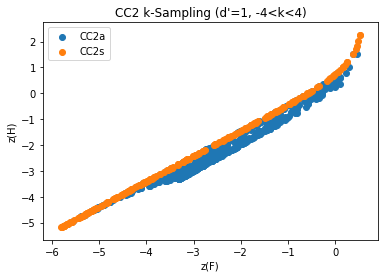

In [118]:
k_range = {'k_min': -4, 'k_max': 4, 'k_num': 1000}
zfa_vals, zha_vals = diff_model.sample_k1_k2_values_to_z(k_range, 1, 500)
zfs_vals, zhs_vals = diff_model.sample_k_values_to_z(k_range, 1, 500)

plt.scatter(zfa_vals, zha_vals, label='CC2a')
plt.scatter(zfs_vals, zhs_vals, label='CC2s')
plt.xlabel('z(F)')
plt.ylabel('z(H)')
plt.title('CC2 k-Sampling (d\'=1, -4<k<4)')
plt.legend()
#plt.savefig('results/cc2_sampling_smallk.png')

In [112]:
# CC2 k-sampling using subject slope-intercept data

k_range = {'k_min': -4, 'k_max': 4, 'k_num': 101}
dp_range = {'dp_min': 0, 'dp_max': 2, 'dp_num': 11}

mb_data = pd.read_csv('data/mb_data.csv', index_col=0)
x_vals = [-4, 3]

for dp in np.linspace(dp_range['dp_min'], dp_range['dp_max'], dp_range['dp_num']):
    zfa_vals, zha_vals = diff_model.sample_k1_k2_values_to_z(k_range, dp, 500)
    zfs_vals, zhs_vals = diff_model.sample_k_values_to_z(k_range, dp, 500)

    plt.gcf().set_size_inches(8, 6)
    plt.scatter(zfa_vals, zha_vals, alpha=0.3, marker='^', facecolor="none", edgecolor='black', label='CC2a')
    plt.scatter(zfs_vals, zhs_vals, alpha=0.3, marker='s', facecolor="none", edgecolor='black', label='CC2s')
    for index, row in mb_data.iterrows():
        slope, intercept = row['Slope'], row['Intercept']
        pred_vals = [slope * n + intercept for n in x_vals]
        plt.plot(x_vals, pred_vals, color='black', alpha=0.1)
    plt.xlabel('z(F)')
    plt.ylabel('z(H)')
    plt.xlim(-4, 3)
    plt.ylim(-4, 3)
    plt.title(f'CC2 k-Value Sampling (d\'={round(dp,2)}, 0<k<4)')
    plt.legend()
    plt.savefig(f'results/k_sampling{round(dp,2)}.png')
    plt.clf()
    

<Figure size 576x432 with 0 Axes>

In [123]:
# CC2 k-sampling w/ subject z-value data

k_range = {'k_min': -5, 'k_max': 5, 'k_num': 201}
dp_range = {'dp_min': 0, 'dp_max': 2.5, 'dp_num': 26}

data = pd.read_csv('data/z_data.csv', index_col=0)
x_vals = [-4, 3]
explained_subs = ['LY', 'YJZ', 'HZL', 'LJJ']

for dp in np.linspace(dp_range['dp_min'], dp_range['dp_max'], dp_range['dp_num']):
    zfa_vals, zha_vals = diff_model.sample_k1_k2_values_to_z(k_range, dp, 1000)
    zfs_vals, zhs_vals = diff_model.sample_k_values_to_z(k_range, dp, 500)

    plt.gcf().set_size_inches(8, 6)
    plt.scatter(zfa_vals, zha_vals, alpha=0.3, marker='^', facecolor="none", edgecolor='black', label='CC2a')
    plt.scatter(zfs_vals, zhs_vals, alpha=0.3, marker='s', facecolor="none", edgecolor='black', label='CC2s')

    for i in range(len(data)):
        sub_data = data.iloc[i]
        if sub_data['Subject'] in explained_subs:
            alpha = 0.3
            zf_vals = sub_data.filter(like='ZF').tolist()
            zh_vals = sub_data.filter(like='ZH').tolist()
            plt.plot(zf_vals, zh_vals, color='black', alpha=alpha)    
    
    plt.xlabel('z(F)')
    plt.ylabel('z(H)')
    plt.xlim(-4, 3)
    plt.ylim(-4, 3)
    plt.title(f'CC2 k-Value Sampling (d\'={round(dp,2)}, -4<k<4)')
    plt.legend()
    plt.savefig(f'results/k_sampling{round(dp,2)}.png')
    plt.clf()


<Figure size 576x432 with 0 Axes>

In [125]:
# CC2 k-sampling w/ subject p-value data

k_range = {'k_min': -4, 'k_max': 4, 'k_num': 201}
dp_range = {'dp_min': 0, 'dp_max': 2.5, 'dp_num': 26}

data = pd.read_csv('data/p_data.csv', index_col=0)
x_vals = [-4, 3]
explained_subs = ['LY', 'YJZ', 'HZL', 'LJJ']

for dp in np.linspace(dp_range['dp_min'], dp_range['dp_max'], dp_range['dp_num']):
    pfa_vals, pha_vals = diff_model.sample_k1_k2_values_to_p(k_range, dp, 1000)
    pfs_vals, phs_vals = diff_model.sample_k_values_to_p(k_range, dp, 500)

    plt.gcf().set_size_inches(8, 6)
    plt.scatter(pfa_vals, pha_vals, alpha=0.3, marker='^', facecolor="none", edgecolor='black', label='CC2a')
    plt.scatter(pfs_vals, phs_vals, alpha=0.3, marker='s', facecolor="none", edgecolor='black', label='CC2s')

    for i in range(len(data)):
        sub_data = data.iloc[i]
        if sub_data['Subject'].replace('\'', "") in explained_subs:
            alpha = 0.3
            pf_vals = sub_data.filter(like='PF').tolist()
            ph_vals = sub_data.filter(like='PH').tolist()
            plt.plot(pf_vals, ph_vals, color='black', alpha=alpha)    
    
    plt.xlabel('p(F)')
    plt.ylabel('p(H)')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.title(f'CC2 k-Value Sampling (d\'={round(dp,2)}, -4<k<4)')
    plt.legend()
    plt.savefig(f'results/k_sampling{round(dp,2)}.png')
    plt.clf()


<Figure size 576x432 with 0 Axes>

In [48]:
import math
def distance(point, coef):
    return abs((coef[0]*point[0])-point[1]+coef[1])/math.sqrt((coef[0]*coef[0])+1)

k_range = {'k_min': 0.1, 'k_max': 5, 'k_num': 201}
dp_range = {'dp_min': 0, 'dp_max': 2.5, 'dp_num': 101}

z_data = pd.read_csv('data/z_data.csv', index_col=0)
p_data = pd.read_csv('data/p_data.csv', index_col=0)
p_data['Subject'] = p_data['Subject'].str.replace('\'', '')
x_vals = [-5, 5]
explained_subs = ['LY', 'YJZ', 'HZL', 'LJJ']

for i in range(len(z_data)):
    
    sub_data = z_data.iloc[i]
    subject = sub_data['Subject'].replace('\'', "")

    if subject in explained_subs:    
        
        best_model = None
        lowest_tls = np.inf
        best_dp = 0

        zf_vals = sub_data.filter(like='ZF').tolist()
        zf_vals = [n for n in zf_vals if n != 0]
        zh_vals = sub_data.filter(like='ZH').tolist()
        zh_vals = [n for n in zh_vals if n != 0]

        subject_model = linregress(zf_vals, zh_vals)
        print(f'{subject}: {subject_model.slope}')

        for dp in np.linspace(dp_range['dp_min'], dp_range['dp_max'], dp_range['dp_num']):
            zf1_vals, zh1_vals = diff_model.sample_k_values_to_z_cc1(k_range, dp, 200)

            if len(zf1_vals) < 2:
                continue
            model = linregress(zf1_vals, zh1_vals)

            y_pred = [model.intercept + model.slope * n for n in x_vals]
            coef = [model.slope, model.intercept]
            tls = np.sum([distance([f, h], coef) for f, h in zip(zf_vals, zh_vals)])

            if tls < lowest_tls:
                lowest_tls = tls
                best_model = model
                best_dp = dp

        y_pred = [best_model.intercept + best_model.slope * n for n in zf_vals]
        ssr = np.sum([(yi - fi)**2 for yi, fi in zip(zh_vals, y_pred)])
        sst = np.sum([(yi - np.mean(zh_vals))**2 for yi in zh_vals])
        r_squared = 1 - ssr/sst

        print(f"TLS: {lowest_tls}\tR^2:{r_squared}")
        y_pred = [best_model.intercept + best_model.slope * n for n in x_vals]

        plt.gcf().set_size_inches(8, 6)
        plt.plot(x_vals, y_pred, color='black', linestyle='--', label=f'y={round(best_model.intercept, 3)}+{round(best_model.slope, 3)}x')
        plt.plot(zf_vals, zh_vals, color='black', label='Human data')
        plt.xlabel('z(F)')
        plt.ylabel('z(H)')
        plt.xlim(-4, 3)
        plt.ylim(-4, 3)
        plt.title(f'CC1 Subject {subject} z-ROC Fitting (d\'={round(best_dp,3)})\n R^2 = {round(r_squared,3)}')
        plt.legend()
        plt.savefig(f'results/output/cc1_zmodel_{subject}.png')
        plt.clf()

        sub_data = p_data[p_data['Subject']==subject].squeeze()

        pf_vals = sub_data.filter(like='PF').tolist()
        pf_vals = [n for n in pf_vals if n != 0]
        ph_vals = sub_data.filter(like='PH').tolist()
        ph_vals = [n for n in ph_vals if n != 0]
        plt.gcf().set_size_inches(8, 6)
        plt.plot(pf_vals, ph_vals, color='black', label='Human data')

        temp_x = np.linspace(-4, 3, 26)
        y_pred = [best_model.intercept + best_model.slope * n for n in temp_x]
        temp_x = [st.norm.cdf(val) for val in temp_x]
        y_pred = [st.norm.cdf(val) for val in y_pred]

        plt.plot(temp_x, y_pred, color='black', linestyle='--', label='CC1 model')        
        plt.xlabel('p(F)')
        plt.ylabel('p(H)')
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        plt.title(f'CC1 Subject {subject} p-ROC Fitting (d\'={round(best_dp,3)})')
        
        plt.legend()
        plt.savefig(f'results/output/cc1_pmodel_{subject}.png')
        plt.clf()


HZL: 0.8340252606594738
TLS: 1.8456768795036578	R^2:-0.03720627610732441
LJJ: 0.8200712683933508
TLS: 1.2883500241551578	R^2:-0.5387592687871874
LY: 0.8430702453355314
TLS: 0.6856446422228475	R^2:0.9649727153557848
YJZ: 0.9384523419085784
TLS: 0.21121166711307615	R^2:0.99156336689325


<Figure size 576x432 with 0 Axes>